In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file = open("Li17Sc5Cl32_L1m_spg_energy_100k.csv", 'r')
lines = file.readlines()

energies = []
mono_energies = {}

for l in lines[1:]:
    split = l.split(',')
    energies.append(float(split[6]))
    
for l, n in zip(lines[1:], range(0, len(energies))):
    split = l.split(',')
    if split[3] == 'monoclinic':
        mono_energies[n] = float(split[6])

structures = list(range(0, len(energies)))
                  
plt.plot(structures, energies)
plt.plot(mono_energies.keys(), mono_energies.values())

plt.ylabel('Ewald energy (eV)', size = 12)
plt.xlabel('Structure number', size = 12)
plt.legend(['triclinic', 'monoclinic'], loc = 'lower right', fontsize = 12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('structure_energies.jpg', bbox_inches='tight', dpi=500)

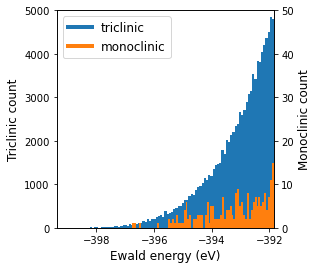

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

file = open("Li17Sc5Cl32_L1m_spg_energy_100k.csv", 'r')
lines = file.readlines()

tri_energies = []
mono_energies = []
    
for l in lines[1:]:
    split = l.split(',')
    if split[3] == 'triclinic':
        tri_energies.append(float(split[6]))
    elif split[3] == 'monoclinic':
        mono_energies.append(float(split[6]))

fig, ax = plt.subplots()
ax.hist(tri_energies, bins = np.linspace(min(tri_energies), max(tri_energies), num=100), color='tab:blue')

ax2 = ax.twinx()
ax2.hist(mono_energies, bins = np.linspace(min(mono_energies), max(mono_energies), num=75), color='tab:orange')

ax.set_ylabel('Triclinic count', size=12)
ax.set_xlim(min(tri_energies), max(tri_energies))
ax.set_ylim(0, 5000)
ax2.set_ylabel('Monoclinic count', size=12)
ax2.set_ylim(0, 50)

ax.set_xlabel('Ewald energy (eV)', size=12)

def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
        
squarify(fig)

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4)]

plt.legend(custom_lines, ['triclinic', 'monoclinic'], loc='upper left', fontsize=12)

plt.savefig('structure_energies_histogram.jpg', bbox_inches='tight', dpi=500)

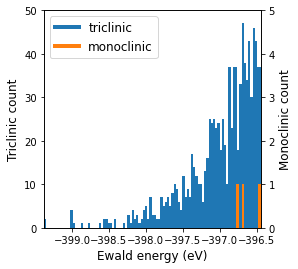

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

file = open("Li17Sc5Cl32_L1m_spg_energy_100k.csv", 'r')
lines = file.readlines()

tri_energies = []
mono_energies = []
    
for l in lines[1:1000]:
    split = l.split(',')
    if split[3] == 'triclinic':
        tri_energies.append(float(split[6]))
    elif split[3] == 'monoclinic':
        mono_energies.append(float(split[6]))

fig, ax = plt.subplots()
ax.hist(tri_energies, bins = np.linspace(min(tri_energies), max(tri_energies), num=100), color='tab:blue')

ax2 = ax.twinx()
ax2.hist(mono_energies, bins = np.linspace(min(mono_energies), max(mono_energies), num=10), color='tab:orange')

ax.set_ylabel('Triclinic count', size=12)
ax.set_xlim(min(tri_energies), max(tri_energies))
ax.set_ylim(0, 50)
ax2.set_ylabel('Monoclinic count', size=12)
ax2.set_ylim(0, 5)

ax.set_xlabel('Ewald energy (eV)', size=12)

def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
        
squarify(fig)

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4)]

plt.legend(custom_lines, ['triclinic', 'monoclinic'], loc='upper left', fontsize=12)

plt.savefig('structure_energies_histogram_zoomed.jpg', bbox_inches='tight', dpi=500)

([<matplotlib.axis.XTick at 0x7fc8262fe340>,
 [Text(0, -0.077, 'P1'),
  Text(1, -0.077, 'P$\\bar{1}$'),
  Text(2, -0.077, 'C2'),
  Text(3, -0.077, 'Cm'),
  Text(4, -0.077, 'C2/m')])

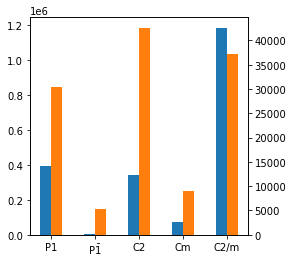

In [130]:
spg = ['P1', r'P$\bar{1}$', 'C2', 'Cm', 'C2/m']
freq = [395518, 5223, 341024, 71970, 1186265]
freq_adjusted = [395518/13, 5223/1, 341024/8, 71970/8, 186265/5]

fig, ax = plt.subplots()

ax.bar(np.arange(len(spg))-0.125, freq, width=0.25)

ax2 = ax.twinx()

ax2.bar(np.arange(len(spg))+0.125, freq_adjusted, width=0.25, color='tab:orange')

def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
        
squarify(fig)

plt.xticks(np.arange(len(spg)), spg, size=12, va = 'bottom', y = -0.077)

([<matplotlib.axis.XTick at 0x7fc826465370>,
 [Text(0, -0.077, 'P1'), Text(1, -0.077, 'C2'), Text(2, -0.077, 'C2/m')])

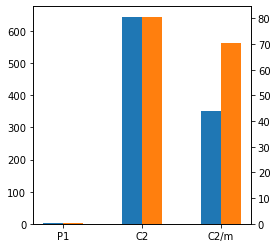

In [131]:
spg = ['P1', 'C2', 'C2/m']
freq = [3, 645, 352]
freq_adjusted = [3/13, 645/8, 352/5]

fig, ax = plt.subplots()

ax.bar(np.arange(len(spg))-0.125, freq, width=0.25)

ax2 = ax.twinx()

ax2.bar(np.arange(len(spg))+0.125, freq_adjusted, width=0.25, color='tab:orange')

def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
        
squarify(fig)

plt.xticks(np.arange(len(spg)), spg, size=12, va = 'bottom', y = -0.077)

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from tqdm import tqdm
import csv

output = open('framework_energy.csv', 'w')
filewriter = csv.writer(output, delimiter=',')

file_1 = open("Li17Sc5Cl32_L1m_spg_energy_100k.csv", 'r')
file_2 = open("1m/1m.csv", 'r')
lines_1 = file_1.readlines()
lines_2 = file_2.readlines()

dict_1 = {}
dict_2 = {}
    
for l in lines_1[1:]:
    split = l.split(',')
    dict_1[split[0][12:]] = split[6]

print('dict_1 created')    
    
for l in lines_2[1:]:
    split = l.split(',')
    dict_2[split[0]] = split[2]

print('dict_2 created')  
    
p1 = []
p1b = []
c2 = []
cm = []
c2m = []

for k1 in tqdm(dict_1.keys()):
    for k2 in dict_2.keys():
        if k1 == k2:
            filewriter.writerow([k1, dict_2[k1], dict_1[k1]])
        else:
            continue

dict_1 created
dict_2 created


100%|█████████████████████████████████| 100000/100000 [2:14:10<00:00, 12.42it/s]


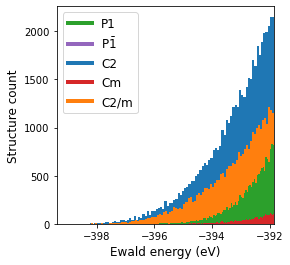

In [228]:
file = open('framework_energy.csv', 'r')
lines = file.readlines()

p1 = []
p1b = []
c2 = []
cm = []
c2m = []

for l in lines:
    split = l.split(',')
    if len(split) == 3:
        value_i = split[2][1:]
        value = value_i[:-1]
        if split[1] == '1':
            p1.append(float(value))
        if split[1] == '2':
            p1b.append(float(value))
        if split[1] == '5':
            c2.append(float(value))
        if split[1] == '8':
            cm.append(float(value))
        if split[1] == '12':
            c2m.append(float(value))
            
fig, ax = plt.subplots()
ax.hist(p1b, bins = np.linspace(min(p1b), max(p1b), num=100), color='tab:orange')
ax.hist(c2, bins = np.linspace(min(c2), max(c2), num=100), color='tab:blue')
ax.hist(c2m, bins = np.linspace(min(c2m), max(c2m), num=100), color='tab:orange')
ax.hist(p1, bins = np.linspace(min(p1), max(p1), num=100), color='tab:green')
ax.hist(cm, bins = np.linspace(min(cm), max(cm), num=100), color='tab:red')

ax.set_xlim(min(c2), max(c2))

ax.set_ylabel('Structure count', size=12)

ax.set_xlabel('Ewald energy (eV)', size=12)

def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
        
squarify(fig)

custom_lines = [Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:purple', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4)]

plt.legend(custom_lines, ['P1', r'P$\bar{1}$', 'C2', 'Cm', 'C2/m'], loc='upper left', fontsize=12)

plt.savefig('framework_energies_histogram.jpg', bbox_inches='tight', dpi=500)

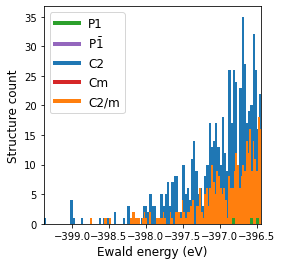

In [226]:
file = open('framework_energy.csv', 'r')
lines = file.readlines()

p1 = []
p1b = []
c2 = []
cm = []
c2m = []

for l in lines[1:2000]:
    split = l.split(',')
    if len(split) == 3:
        value_i = split[2][1:]
        value = value_i[:-1]
        if split[1] == '1':
            p1.append(float(value))
        if split[1] == '2':
            p1b.append(float(value))
        if split[1] == '5':
            c2.append(float(value))
        if split[1] == '8':
            cm.append(float(value))
        if split[1] == '12':
            c2m.append(float(value))
            
fig, ax = plt.subplots()
#ax.hist(p1b, bins = np.linspace(min(p1b), max(p1b), num=100), color='tab:orange')
ax.hist(c2, bins = np.linspace(min(c2), max(c2), num=100), color='tab:blue')
ax.hist(c2m, bins = np.linspace(min(c2m), max(c2m), num=100), color='tab:orange')
ax.hist(p1, bins = np.linspace(min(p1), max(p1), num=10), color='tab:green')
#ax.hist(cm, bins = np.linspace(min(cm), max(cm), num=100), color='tab:red')

ax.set_xlim(min(c2), max(c2))

ax.set_ylabel('Structure count', size=12)

ax.set_xlabel('Ewald energy (eV)', size=12)

def squarify(fig):
    w, h = fig.get_size_inches()
    if w > h:
        t = fig.subplotpars.top
        b = fig.subplotpars.bottom
        axs = h*(t-b)
        l = (1.-axs/w)/2
        fig.subplots_adjust(left=l, right=1-l)
    else:
        t = fig.subplotpars.right
        b = fig.subplotpars.left
        axs = w*(t-b)
        l = (1.-axs/h)/2
        fig.subplots_adjust(bottom=l, top=1-l)
        
squarify(fig)

custom_lines = [Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:purple', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4)]

plt.legend(custom_lines, ['P1', r'P$\bar{1}$', 'C2', 'Cm', 'C2/m'], loc='upper left', fontsize=12)

plt.savefig('framework_energies_histogram_zoomed.jpg', bbox_inches='tight', dpi=500)

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([-392.788     , -392.77862626, -392.76925253, -392.75987879,
        -392.75050505, -392.74113131, -392.73175758, -392.72238384,
        -392.7130101 , -392.70363636, -392.69426263, -392.68488889,
        -392.67551515, -392.66614141, -392.65676768, -392.64739394,
        -392.6380202 , -392.62864646, -392.61927273, -392.60989899,
        -392.60052525, -392.59115152, -392.58177778, -392.57240404,
        -392.5630303 , -392.55365657, -392.54428283, -392.53490909,
        -392.52553535, -392.51616162, -392.50678788, -392.49741414,
        -3

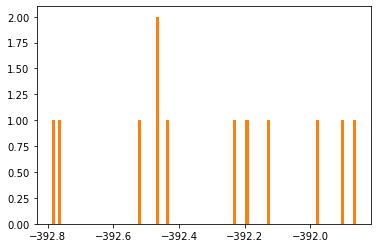

In [186]:
fig, ax = plt.subplots()
ax.hist(p1b, bins = np.linspace(min(p1b), max(p1b), num=100), color='tab:orange')

In [188]:
print(len(p1))
print(len(p1b))
print(len(c2))
print(len(cm))
print(len(c2m))

15776
12
50713
2569
30699
